# Install drillvision

In [1]:
!pip install drillvision


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import appropriate modules

In [1]:
from neural_network_model.transfer_learning import TransferModel
from pathlib import Path

# Initiate TransferModel object and set the directory for dataset

In [2]:
transfer_model = TransferModel(
        dataset_address=Path("__file__").parent / ".." / "dataset_ad"
    )

2023-11-20 10:51:28,192 - INFO - Data was prepared


# Illustrate the distribution of images across various classes in the dataset

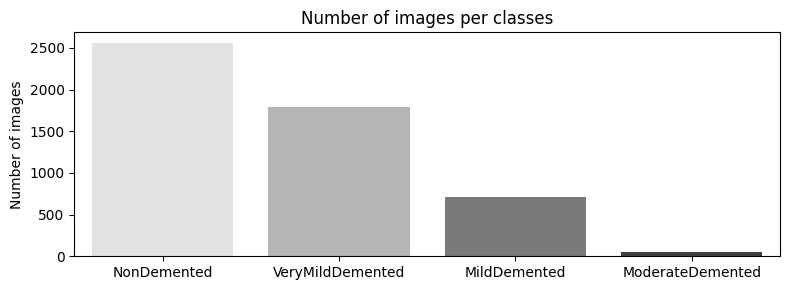

2023-11-19 17:05:27,300 - INFO - number of images belong to MildDemented: 717
2023-11-19 17:05:27,301 - INFO - number of images belong to ModerateDemented: 52
2023-11-19 17:05:27,301 - INFO - number of images belong to NonDemented: 2560
2023-11-19 17:05:27,301 - INFO - number of images belong to VeryMildDemented: 1792


In [7]:
transfer_model.plot_classes_number(
    figsize=(8, 3),
    figure_folder_path=Path("__file__").parent / "figures",
    palette="Greys"
)

# Examine the images and assess their width and height to identify any discrepancies in dimensions

2023-11-19 17:08:33,727 - INFO -    width  height       classes      image_name
0    208     176  MildDemented    mildDem0.jpg
1    208     176  MildDemented    mildDem1.jpg
2    208     176  MildDemented   mildDem10.jpg
3    208     176  MildDemented  mildDem100.jpg
4    208     176  MildDemented  mildDem101.jpg
2023-11-19 17:08:33,793 - WARNING - No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


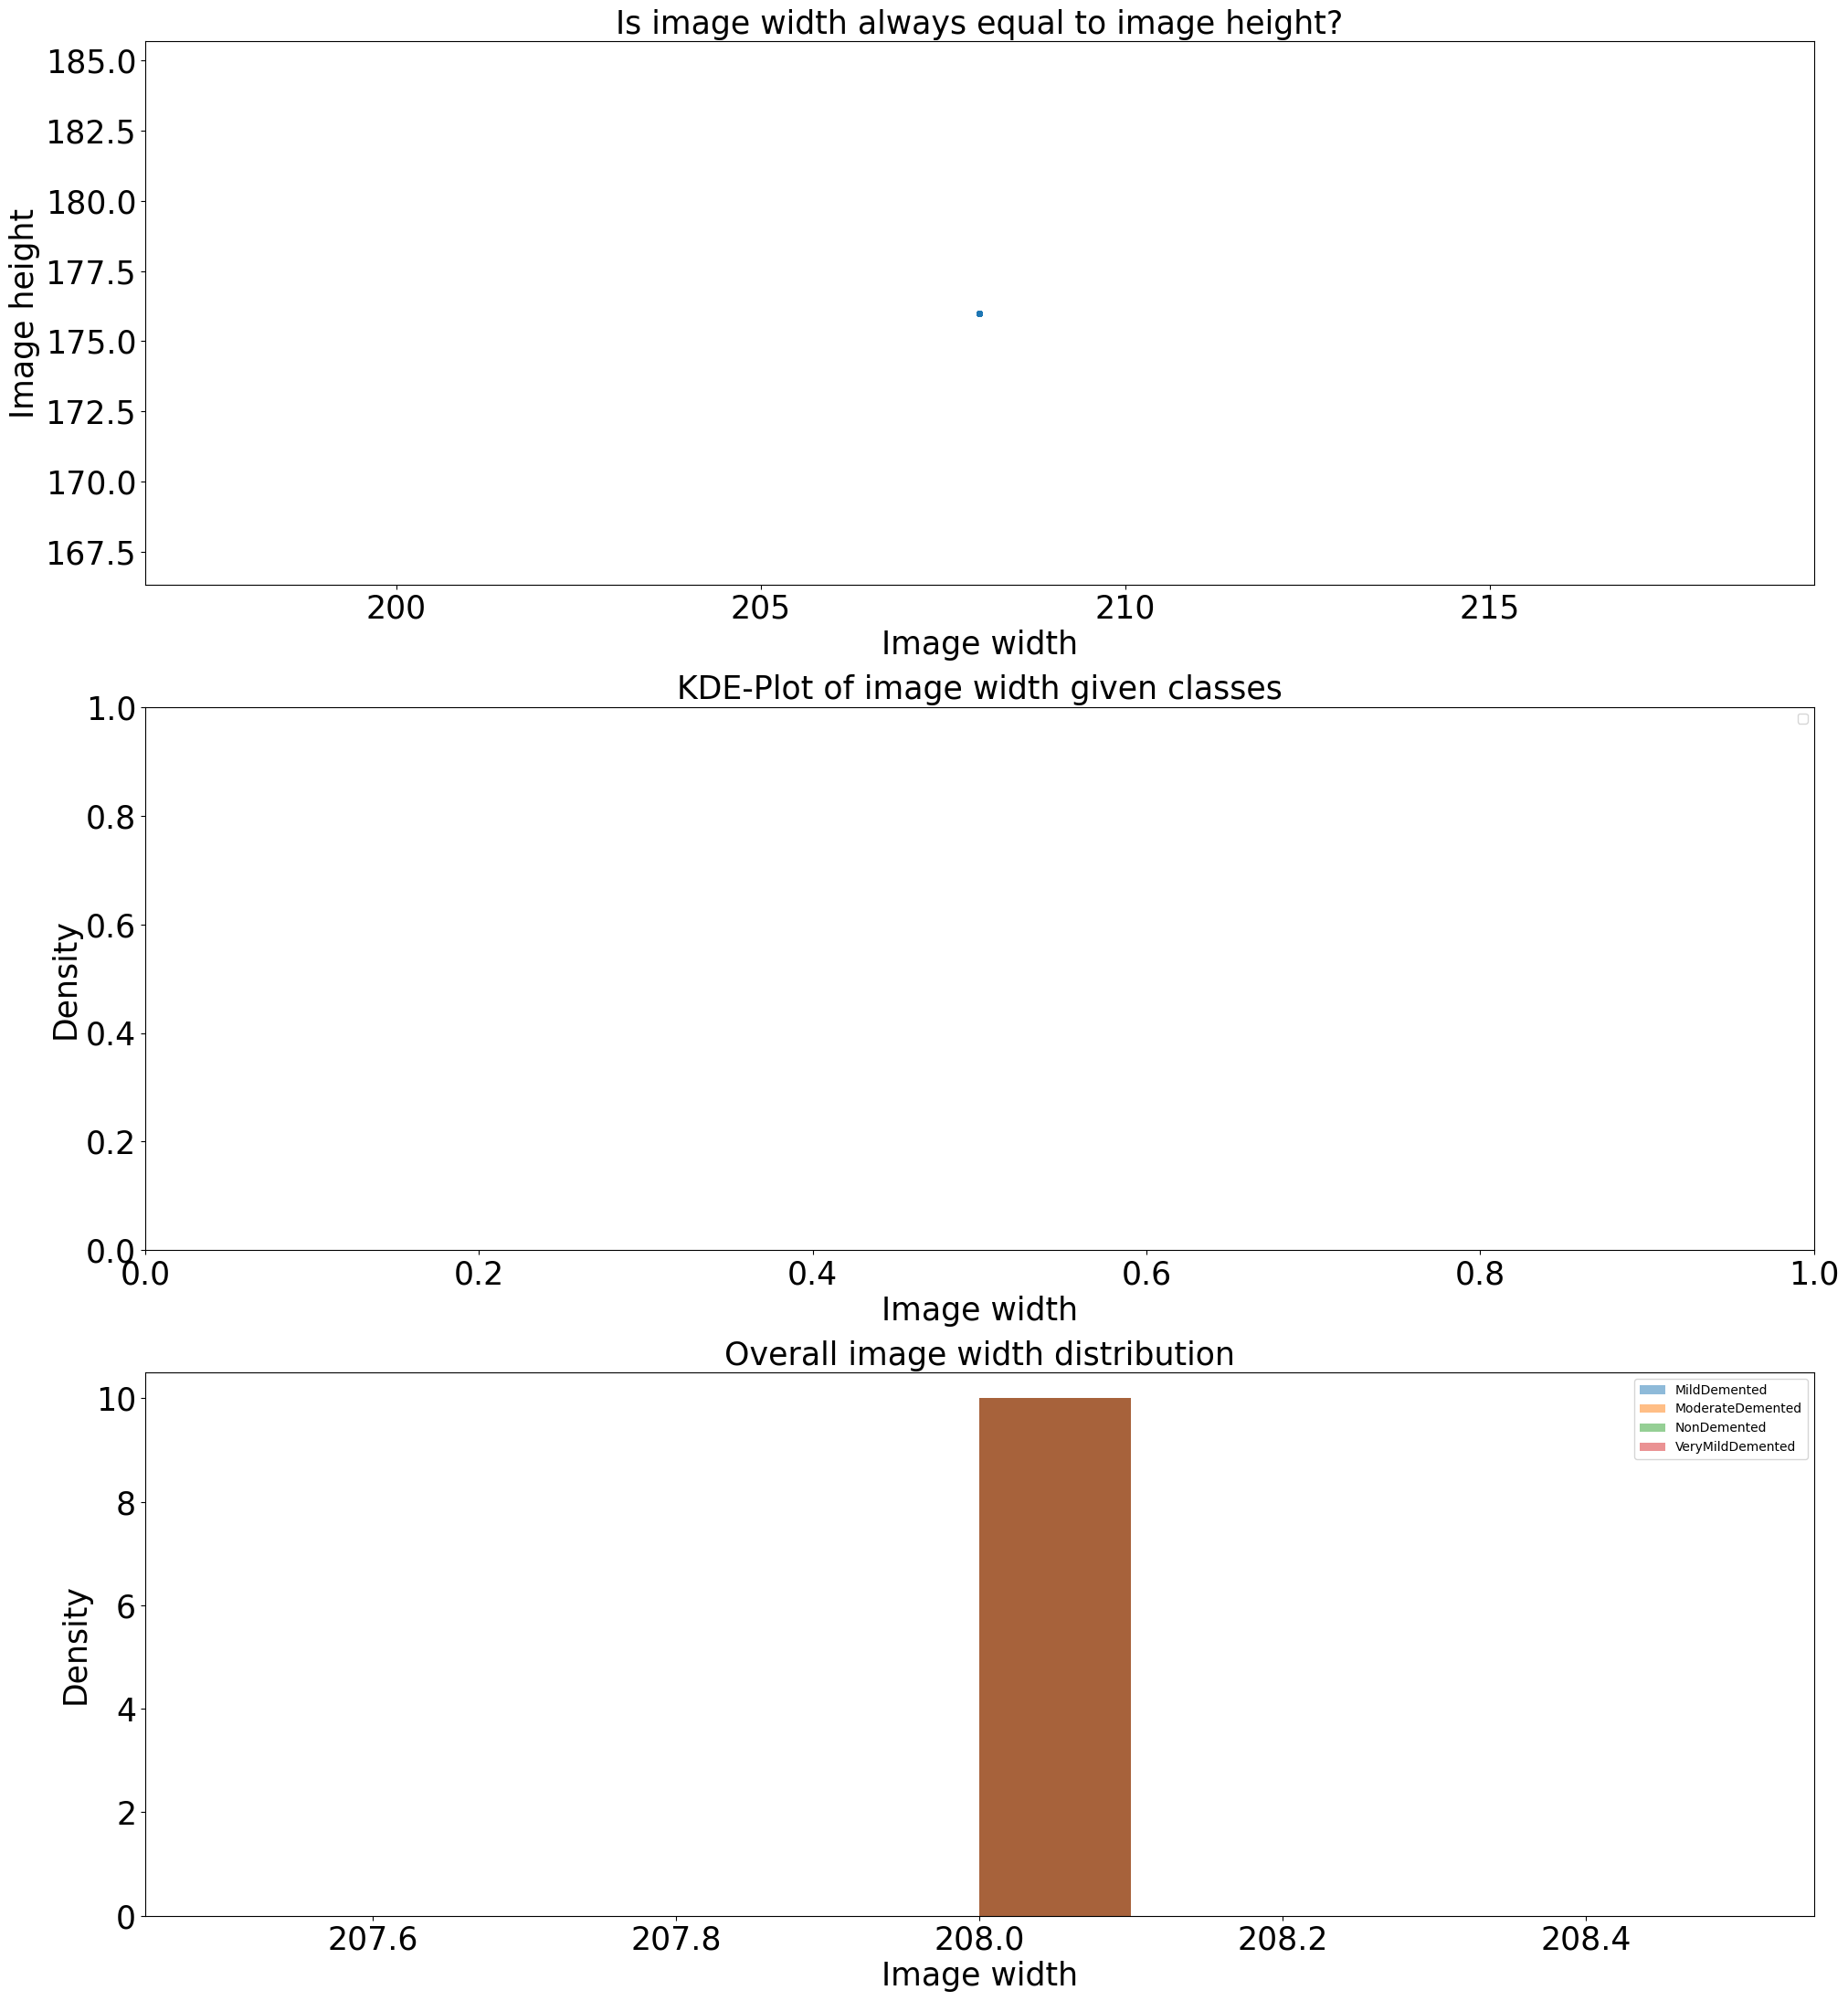

2023-11-19 17:08:34,871 - INFO - Mean states: [[208. 176.]]
2023-11-19 17:08:34,873 - INFO - Cluster number order: [0]
2023-11-19 17:08:34,873 - INFO - cluster_info_dict
 {'mean_width_height': [[208.0, 176.0]], 'cluster_number_order': [0]}


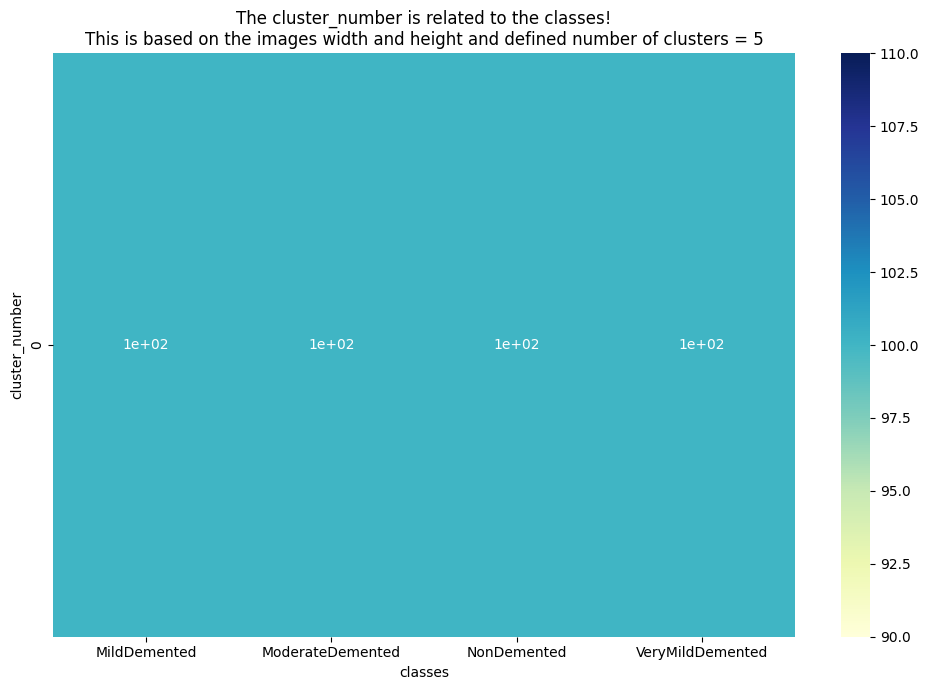

In [8]:
transfer_model.analyze_image_names()

# Plot the images using cmap jet

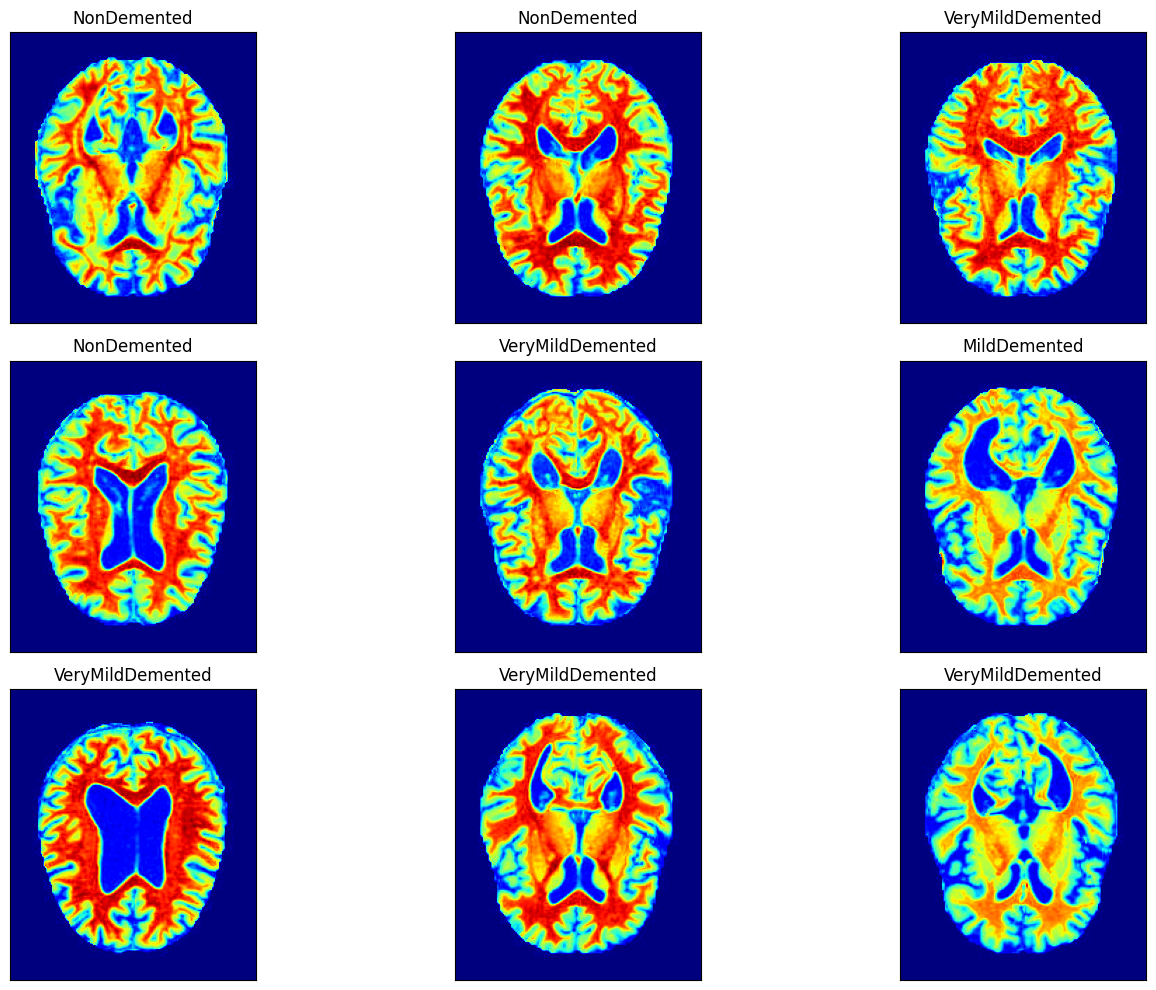

In [9]:
transfer_model.plot_data_images(num_rows=3, num_cols=3, cmap="jet")

# Utilize transfer learning for training and specify the save path for the trained transfer_model along with its given name.

In [11]:
transfer_model.train_model(
    epochs=3,
    model_save_path=(Path("__file__").parent / ".." / "deep_model").resolve(),
    model_name="tf_model_ad_1_tutorial.h5",
)

Found 4148 validated image filenames belonging to 4 classes.
Found 460 validated image filenames belonging to 4 classes.
Found 513 validated image filenames belonging to 4 classes.
Epoch 1/3
130/130 [==============================] - 82s 615ms/step - loss: 0.9621 - categorical_accuracy: 0.5429 - val_loss: 0.9470 - val_categorical_accuracy: 0.5522
Epoch 2/3
130/130 [==============================] - 71s 546ms/step - loss: 0.8302 - categorical_accuracy: 0.6090 - val_loss: 0.8046 - val_categorical_accuracy: 0.6413
Epoch 3/3
130/130 [==============================] - 70s 537ms/step - loss: 0.7622 - categorical_accuracy: 0.6500 - val_loss: 0.8875 - val_categorical_accuracy: 0.5848


# Graph the metrics against the iteration number for visualization.

2023-11-19 17:12:57,731 - INFO - Plotting metric: val_loss and title: Loss
2023-11-19 17:12:57,776 - INFO - Plotting metric: val_categorical_accuracy and title: Categorical_accuracy


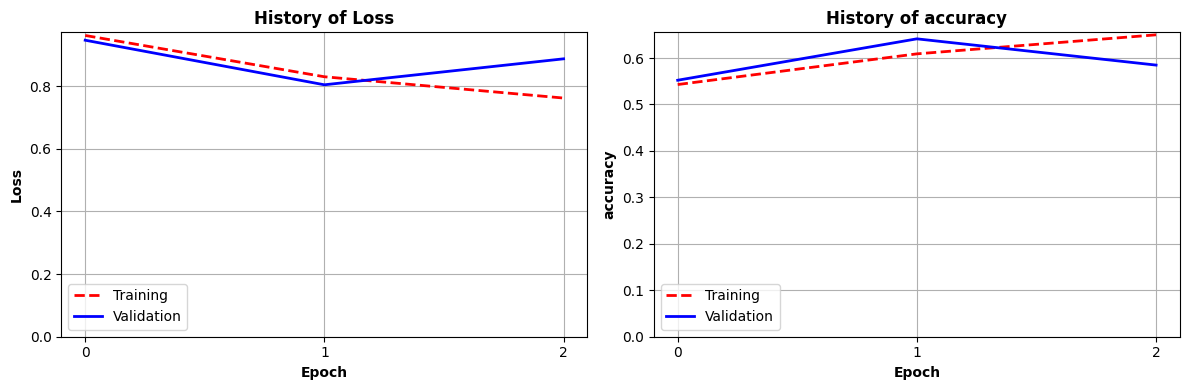

In [12]:
transfer_model.plot_metrics_results()

In [13]:
transfer_model.results()

Found 4148 validated image filenames belonging to 4 classes.
Found 460 validated image filenames belonging to 4 classes.
Found 513 validated image filenames belonging to 4 classes.


 ## Test Loss: 0.86735

## Accuracy on the test set: 60.23%

 ## Test Loss: 0.86735
## Accuracy on the test set: 60.23%


# Generate plots for images belonging to the specified classes, and employ the model to predict their respective labels

Found 4148 validated image filenames belonging to 4 classes.
Found 460 validated image filenames belonging to 4 classes.
Found 513 validated image filenames belonging to 4 classes.
17/17 [==============================] - 9s 517ms/step
The first ... predictions: ['NonDemented', 'NonDemented', 'NonDemented', 'VeryMildDemented', 'VeryMildDemented']


classification_report
                   precision    recall  f1-score   support

    MildDemented       0.73      0.26      0.39        72
ModerateDemented       0.00      0.00      0.00         5
     NonDemented       0.87      0.45      0.59       256
VeryMildDemented       0.46      0.91      0.61       180

        accuracy                           0.58       513
       macro avg       0.51      0.40      0.40       513
    weighted avg       0.70      0.58      0.56       513


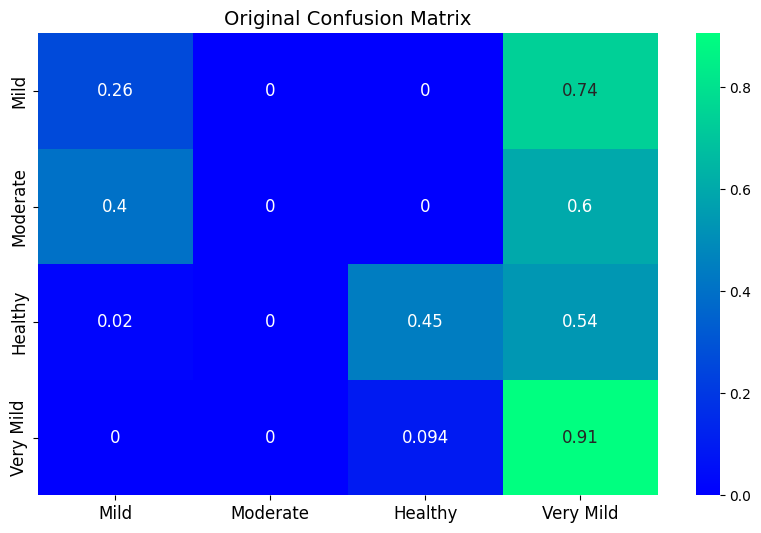

'                  precision    recall  f1-score   support\n\n    MildDemented       0.73      0.26      0.39        72\nModerateDemented       0.00      0.00      0.00         5\n     NonDemented       0.87      0.45      0.59       256\nVeryMildDemented       0.46      0.91      0.61       180\n\n        accuracy                           0.58       513\n       macro avg       0.51      0.40      0.40       513\n    weighted avg       0.70      0.58      0.56       513\n'

In [15]:
custom_titles = {
    "NonDemented": "Healthy",
    "ModerateDemented": "Moderate",
    "MildDemented": "Mild",
    "VeryMildDemented": "Very Mild",
}
transfer_model.predict_test(
    model_path=(
        Path("__file__").parent / ".." / "deep_model" / "tf_model_ad_1.h5"
    ).resolve(),
    rotation=90,
    y_axis_label_size=12,
    x_axis_label_size=12,
    title_size=14,
    fig_title="Original Confusion Matrix",
    conf_matx_font_size=12,
    custom_titles=custom_titles,
    cmap="winter",
    normalize="true",
)

# Apply Grad-CAM (Gradient-weighted Class Activation Mapping) to visualize and interpret the activations of a specific layer in the model

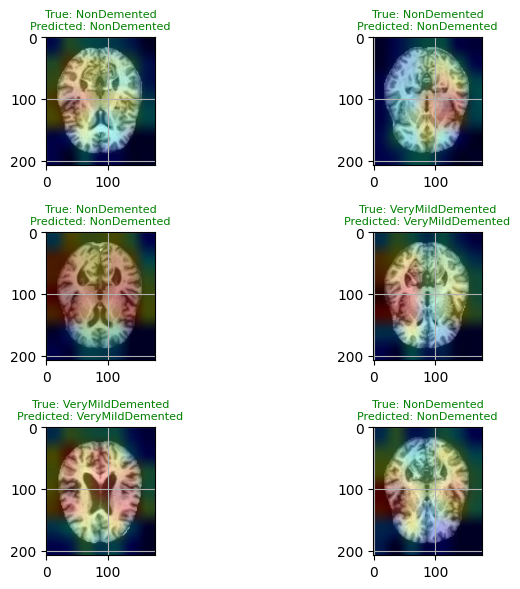

In [16]:
transfer_model.grad_cam_viz(num_rows=3, num_cols=2)